# **피크점 사용자 input[nm]**

Saving UR2 BXPC3 raman raw data__24h.csv to UR2 BXPC3 raman raw data__24h.csv


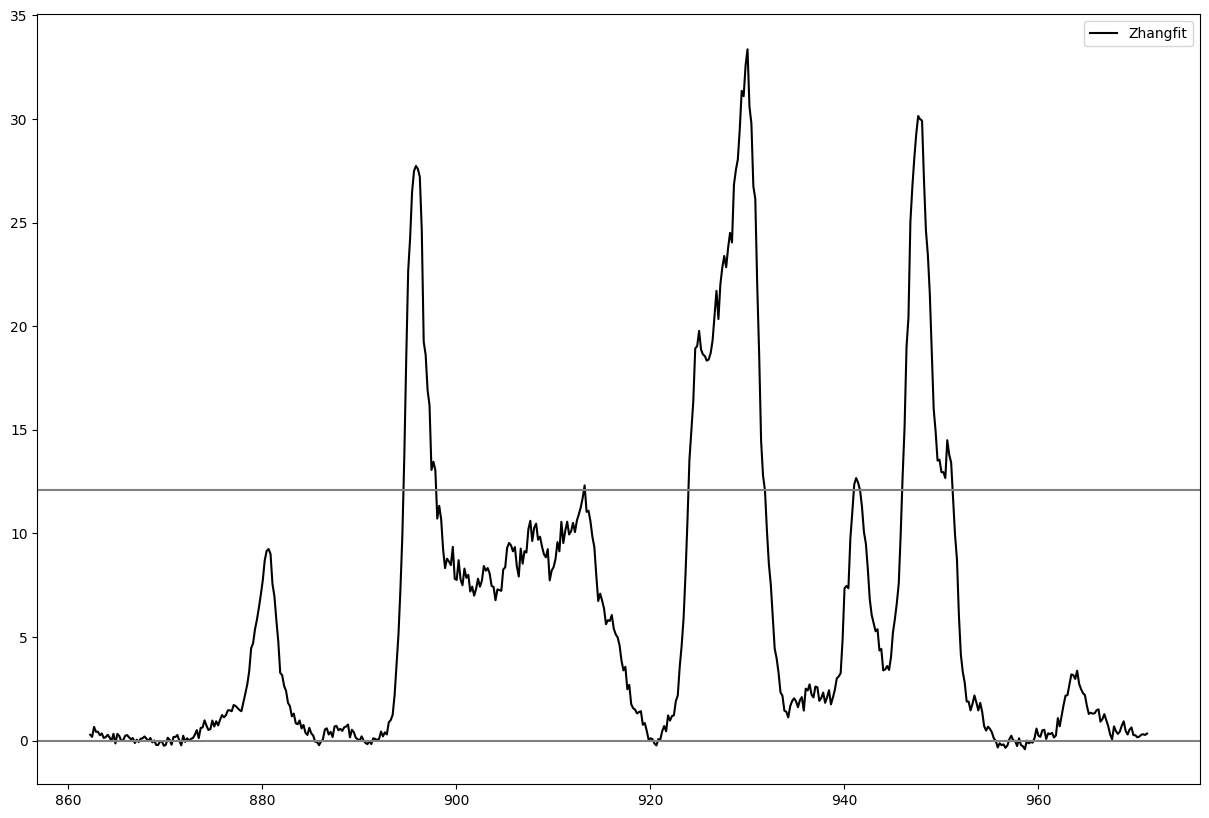

시작 피크점 입력 : 800
끝 피크점 입력 : 940


,Raman peaks (cm−1),Strength,Assignment,Vibrational mode,PMID,Link
54,810.0,NaN,L-serine,C-C-O stretching vibration,30666105,Test
55,816.0,medium,CCH deformation aliphatic (collagen),NaN,20223058,Test
56,818.0,weak,Collagen,C─C stretching,21747512,Test
57,820.0,NaN,Structural protein modes of tumors,NaN,32508914,Test
58,823.0,medium,Tyrosine,Ring breathing,21747512,Test
59,825.0,NaN,"DNA/RNA backbone, protein (tyrosine)","O─P─O stretch, ring breathing",34743445,Test
60,826.0,NaN,Tyrosine,NaN,32508914,Test
61,827.0,NaN,"DNA/RNA backbone, protein (tyrosine)","O─P─O stretch, ring breathing",34743445,Test
62,828.0,NaN,Tyr,NaN,36239879,Test
63,829.0,NaN,Nucleic acid,PO2- asymmetric stretch,24710050,Test


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval
import tkinter as tk
from tkinter import filedialog
from google.colab import files


# 데이터 로드
uploaded = files.upload()

# Read the uploaded file
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# 소수점 둘째 자리까지 반올림
df = df.round(2)

cols = len(df.columns) - 1

df['Axis [nm]'] = df['Axis [nm]'].replace('[\$,]', '', regex=True).astype(float)
x = df['Axis [nm]']

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터 (ROI 2 [])
i = 2
colName = f'ROI {i} []'
df[colName] = df[colName].replace('[\$,]', '', regex=True).astype(float)
y = df[colName]

# 다항식 차수
polynomial_degree = 3

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()

# 그래프 그리기
plt.figure(figsize=(15, 10))
plt.plot(x, Zhangfit_output, label='Zhangfit', color='black')
plt.axhline(y=min(y), color='gray')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


# 엑셀 파일 불러오기
table_df = pd.read_excel('/content/RamanPeak Table_test.xlsx')

# 피크 시작점과 끝점 입력 받기
start_point = float(input("시작 피크점 입력 : "))
end_point = float(input("끝 피크점 입력 : "))


# 컬럼 값을 숫자형(float)으로 변환
table_df['Raman peaks (cm−1)'] = pd.to_numeric(table_df['Raman peaks (cm−1)'], errors='coerce')

# 데이터 필터링
filtered_table_df = table_df[(table_df['Raman peaks (cm−1)'].notnull()) & (table_df['Raman peaks (cm−1)'] >= start_point) & (table_df['Raman peaks (cm−1)'] <= end_point)]

# 필터링된 데이터를 새로운 엑셀 파일로 저장
filtered_table_df.to_excel("RamanPeak Table_test_filtered.xlsx", index=False)

# 필터링된 데이터 출력
#print(filtered_table_df[['Raman peaks (cm−1)', 'Strength', 'Assignment', 'Vibrational mode']])

# 데이터프레임으로 출력
filtered_table_df

# **피크점 사용자 input[cm]**

Saving gem_4lipids_backgroundsignal1.csv to gem_4lipids_backgroundsignal1 (1).csv


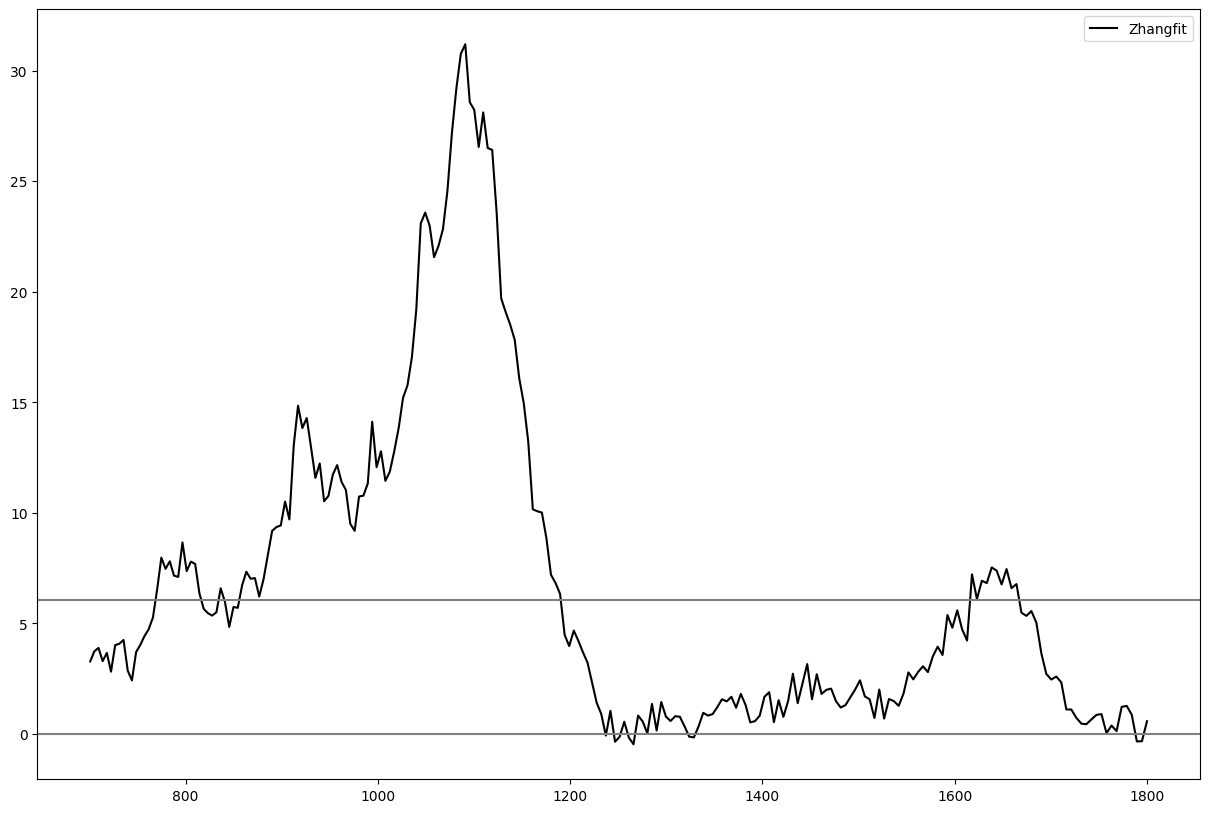

시작 피크점 입력 : 1200
끝 피크점 입력 : 1800


,Raman peaks (cm−1),Strength,Assignment,Vibrational mode,PMID,Link
161,1204.0,NaN,"Protein (phenylalanine, tryptophan, tyrosine)",C − C6H5 stretch,34743445,Test
162,1206.0,NaN,Tyrosine,NaN,32508914,Test
163,1206.0,medium,Tyrosine,Ring vibration,21747512,Test
164,1208.0,NaN,Trp,NaN,36239879,Test
165,1208.0,weak,CC stretch backbone phenyl ring,NaN,20223058,Test
...,...,...,...,...,...,...
270,1722.0,NaN,ester group3,NaN,22502575,Test
271,1729.0,NaN,Ester group,NaN,32508914,Test
272,1732.0,NaN,"Lipids, phospholipids",(C═C) stretch,23154776,Test
273,1745.0,NaN,C=O group of lipids and lipids esters.,NaN,32531903,Test


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval
import tkinter as tk
from tkinter import filedialog
from google.colab import files


# 데이터 로드
uploaded = files.upload()

# Read the uploaded file
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# 소수점 둘째 자리까지 반올림
df = df.round(2)

cols = len(df.columns) - 1

df['Axis [cm]'] = df['Axis [cm]'].replace('[\$,]', '', regex=True).astype(float)
x = df['Axis [cm]']

# X축 데이터
x = df['Axis [cm]'].values

# Y축 데이터 (ROI 2 [])
i = 1
colName = f'ROI {i} []'
df[colName] = df[colName].replace('[\$,]', '', regex=True).astype(float)
y = df[colName]

# 다항식 차수
polynomial_degree = 3

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()

# 그래프 그리기
plt.figure(figsize=(15, 10))
plt.plot(x, Zhangfit_output, label='Zhangfit', color='black')
plt.axhline(y=min(y), color='gray')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


# 엑셀 파일 불러오기
table_df = pd.read_excel('/content/RamanPeak Table_test.xlsx')

# 피크 시작점과 끝점 입력 받기
start_point = float(input("시작 피크점 입력 : "))
end_point = float(input("끝 피크점 입력 : "))


# 컬럼 값을 숫자형(float)으로 변환
table_df['Raman peaks (cm−1)'] = pd.to_numeric(table_df['Raman peaks (cm−1)'], errors='coerce')

# 데이터 필터링
filtered_table_df = table_df[(table_df['Raman peaks (cm−1)'].notnull()) & (table_df['Raman peaks (cm−1)'] >= start_point) & (table_df['Raman peaks (cm−1)'] <= end_point)]

# 필터링된 데이터를 새로운 엑셀 파일로 저장
filtered_table_df.to_excel("RamanPeak Table_test_filtered.xlsx", index=False)

# 필터링된 데이터 출력
#print(filtered_table_df[['Raman peaks (cm−1)', 'Strength', 'Assignment', 'Vibrational mode']])

# 데이터프레임으로 출력
filtered_table_df

# **피크점 사용자 input_일반화**

In [1]:
!pip install BaselineRemoval

Saving cnt_new_4nucleus.csv to cnt_new_4nucleus (1).csv


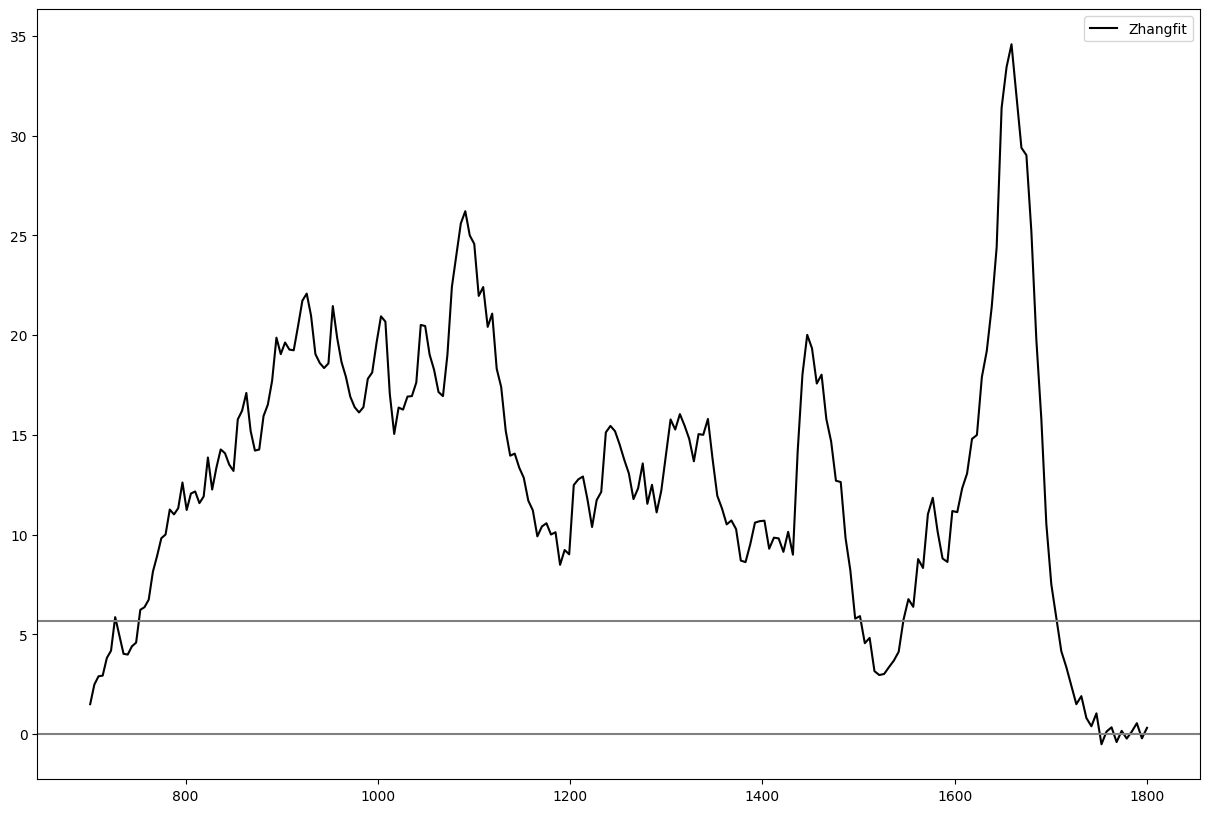

시작 피크점 입력 : 800
끝 피크점 입력 : 1200


,Raman peaks (cm−1),Strength,Assignment,Vibrational mode,PMID,Link
54,810.0,NaN,L-serine,C-C-O stretching vibration,30666105,Test
55,816.0,medium,CCH deformation aliphatic (collagen),NaN,20223058,Test
56,818.0,weak,Collagen,C─C stretching,21747512,Test
57,820.0,NaN,Structural protein modes of tumors,NaN,32508914,Test
58,823.0,medium,Tyrosine,Ring breathing,21747512,Test
...,...,...,...,...,...,...
156,1173.0,NaN,"Tyrosine, hemoglobin, Flavin",C─H in-plane bending,23154776,Test
157,1174.0,NaN,"Trp, Phe",NaN,36239879,Test
158,1176.0,weak,Cytosine/guanine/adenine,NaN,20223058,Test
159,1184.0,medium,NaN,C─H in-plane bend,29981226,Test


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval
import tkinter as tk
from tkinter import filedialog
from google.colab import files


# 데이터 로드
uploaded = files.upload()

# Read the uploaded file
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# 소수점 둘째 자리까지 반올림
df = df.round(2)

cols = len(df.columns) - 1

# X축 데이터
x_col_name = df.columns[0]
x = df[x_col_name].values

# Y축 데이터 (ROI 2 [])
y_col_name = df.columns[1]
y = df[y_col_name]

# 다항식 차수
polynomial_degree = 3

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()

# 그래프 그리기
plt.figure(figsize=(15, 10))
plt.plot(x, Zhangfit_output, label='Zhangfit', color='black')
plt.axhline(y=min(y), color='gray')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


# 엑셀 파일 불러오기
table_df = pd.read_excel('/content/RamanPeak Table_test.xlsx')

# 피크 시작점과 끝점 입력 받기
start_point = float(input("시작 피크점 입력 : "))
end_point = float(input("끝 피크점 입력 : "))


# 컬럼 값을 숫자형(float)으로 변환
table_df['Raman peaks (cm−1)'] = pd.to_numeric(table_df['Raman peaks (cm−1)'], errors='coerce')

# 데이터 필터링
filtered_table_df = table_df[(table_df['Raman peaks (cm−1)'].notnull()) & (table_df['Raman peaks (cm−1)'] >= start_point) & (table_df['Raman peaks (cm−1)'] <= end_point)]

# 필터링된 데이터를 새로운 엑셀 파일로 저장
filtered_table_df.to_excel("RamanPeak Table_test_filtered.xlsx", index=False)

# 필터링된 데이터 출력
#print(filtered_table_df[['Raman peaks (cm−1)', 'Strength', 'Assignment', 'Vibrational mode']])

# 데이터프레임으로 출력
filtered_table_df


# **두 그래프 출력 + 차이값 출력 + 순서정렬**

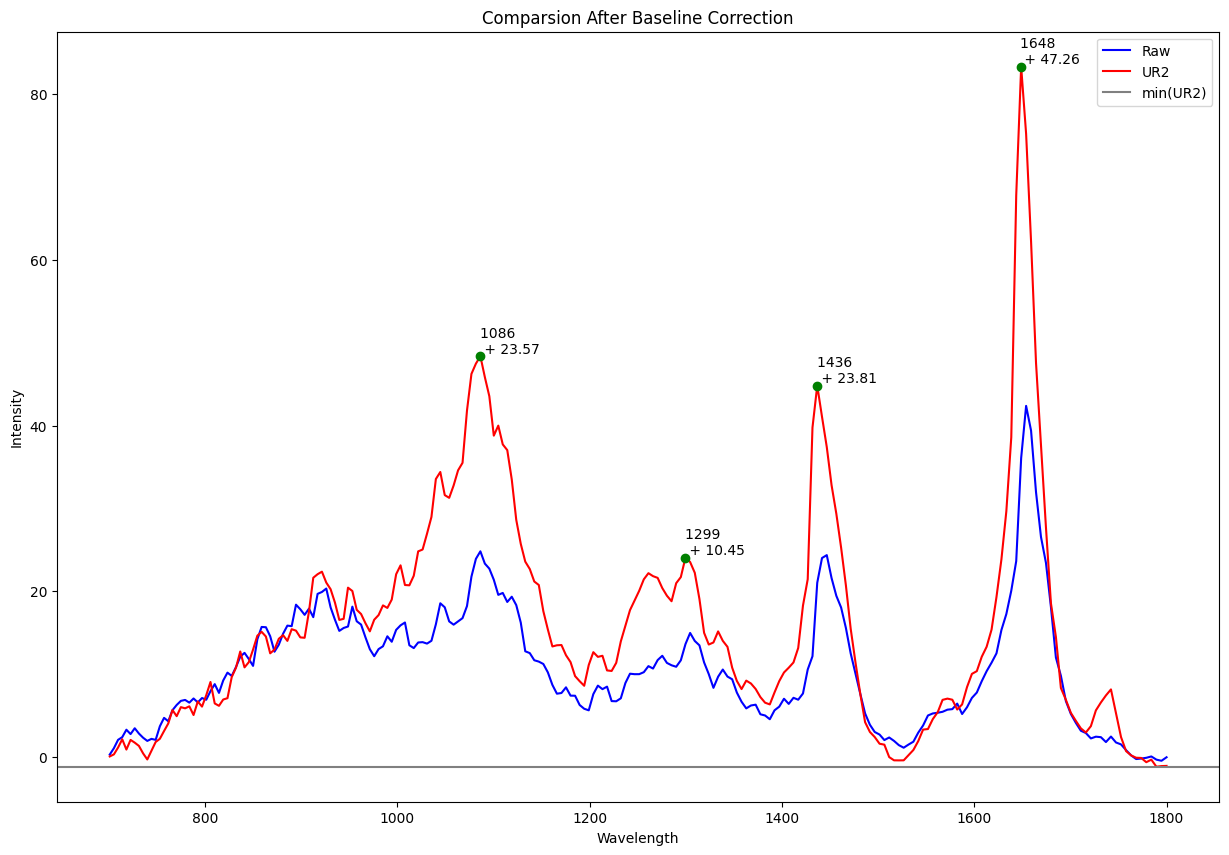

,Wavelength,ChangeValue
29,1648.77,47.264944
30,1643.63,44.173762
28,1653.92,32.858627
72,1431.72,27.622688
146,1077.01,24.484853
...,...,...
226,718.13,-2.397958
184,903.51,-2.771400
202,823.26,-3.088440
186,894.53,-3.136071


In [ ]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from scipy.signal import find_peaks, peak_prominences

# 데이터 로드 df1 - Raw / df2 - UR2
df1 = pd.read_csv('/content/cnt_new_4lipids.csv')
df2 = pd.read_csv('/content/ur2_4lipids.csv')

# 빈 리스트
list1 = []
list2 = []

# 소수점 둘째 자리까지 반올림
df1 = df1.round(2)
df2 = df2.round(2)

# 첫번째 행 읽기
col1 = df1.columns
col2 = df2.columns

# X축 데이터
x1 = df1[col1[0]]
x2 = df2[col2[0]]

# Raw - Y좌표
for i in range(1,len(col1)):
    colName = f'ROI {i} []'
    list1.append(colName)

# UR2 - Y좌표
for i in range(1,len(col2)):
    colName = f'ROI {i} []'
    list2.append(colName)

# Y좌표 평균값
y1 = df1[list1].mean(axis=1).values
y2 = df2[list2].mean(axis=1).values

# 베이스라인 조정
baseObj1 = BaselineRemoval(y1)
baseObj2 = BaselineRemoval(y2)
Zhangfit_output1 = baseObj1.ZhangFit()
Zhangfit_output2 = baseObj2.ZhangFit()

# peak 변수
baselined_spectrum1 = Zhangfit_output1
baselined_spectrum2 = Zhangfit_output2

# peak값 찾기
peaks, _ = find_peaks(baselined_spectrum1, height=0, width=2)
prominences = peak_prominences(baselined_spectrum1, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum1, prominence=prominence_new)

peaks, _ = find_peaks(baselined_spectrum2, height=0, width=2)
prominences = peak_prominences(baselined_spectrum2, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum2, prominence=prominence_new)

# 그래프 그리기
plt.figure(figsize=(15,10))
#plt.plot(x1,y1)
#plt.plot(x2, y2)
plt.plot(x1, Zhangfit_output1, label='Raw', color='blue')
plt.plot(x2, Zhangfit_output2, label='UR2', color='red')
#plt.axhline(y=min(Zhangfit_output1), label='min(Raw)', color='gray')
plt.axhline(y=min(Zhangfit_output2), label='min(UR2)', color='gray')
#plt.axhline(y=0, label='y=0', color='gray')

# peak값 그래프 표시 (UR2)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # x 값
    plt.plot(x_value, baselined_spectrum2[peaks[i]], "go")

# 피크점 수치 출력 (파수, UR2-Raw)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # 피크의 x 값
    y_value1 = baselined_spectrum1[peaks[i]]  # 피크의 y 값
    y_value2 = baselined_spectrum2[peaks[i]]  # 피크의 y 값
    change_value = y_value2 - y_value1 # (UR2 - Raw) 차이
    x_value = int(x_value)
    plt.text(x_value, y_value2, f'{x_value} \n +{change_value: .2f}', fontsize=10, verticalalignment='bottom')

# 그래프 범례 및 띄우기
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Comparsion After Baseline Correction')
plt.legend()
plt.show()

# 차이값 데이터프레임 생성
df_change = pd.DataFrame({
    'Wavelength' : x1,
    'ChangeValue' : Zhangfit_output2-Zhangfit_output1
})

# 정렬하여 차이가 많이 나는 순서대로 출력
df_change_sorted = df_change.sort_values(by='ChangeValue', ascending=False)

# Display the sorted dataframe
df_change_sorted


# **두 그래프 출력 + 차이값 출력(색상 수정) + 순서정렬**

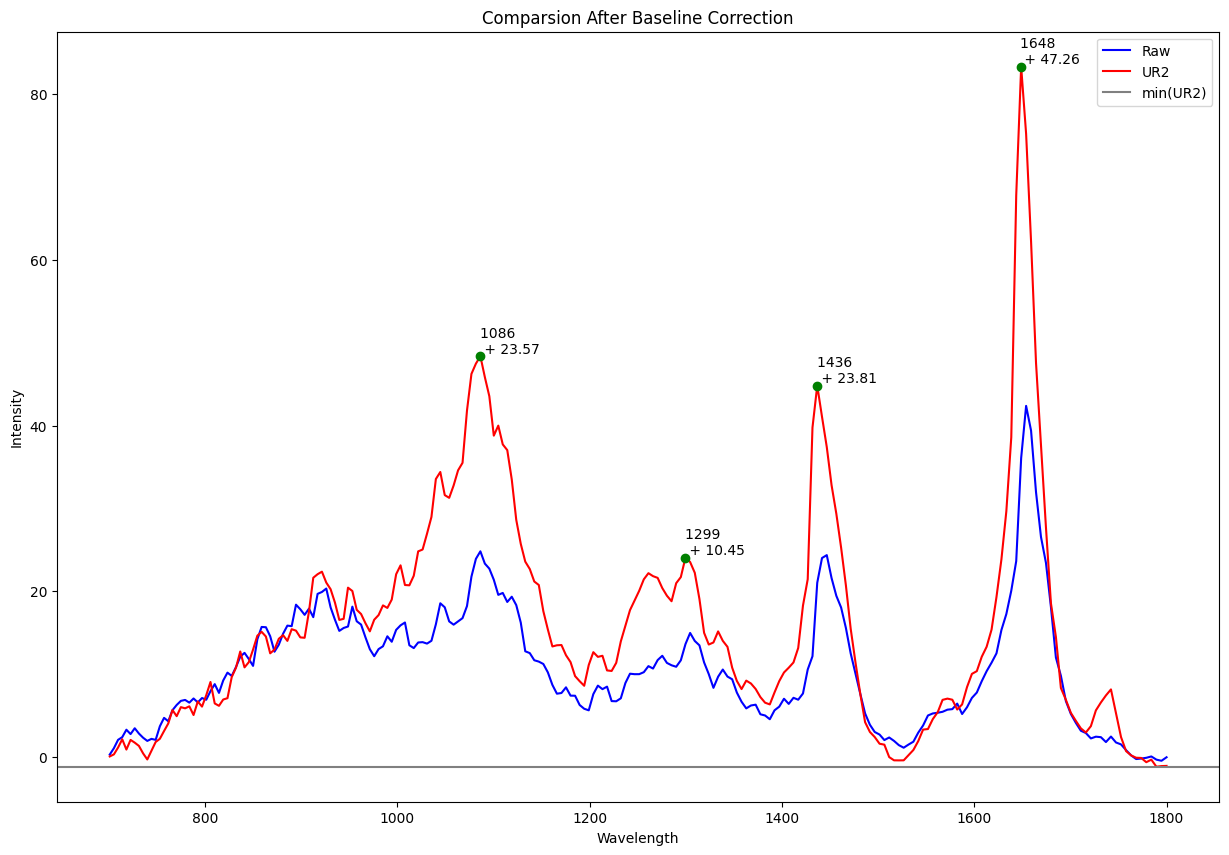

,Wavelength,ChangeValue
29,1648.77,47.264944
30,1643.63,44.173762
28,1653.92,32.858627
72,1431.72,27.622688
146,1077.01,24.484853
...,...,...
226,718.13,-2.397958
184,903.51,-2.771400
202,823.26,-3.088440
186,894.53,-3.136071


In [ ]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from scipy.signal import find_peaks, peak_prominences

# 데이터 로드 df1 - Raw / df2 - UR2
df1 = pd.read_csv('/content/cnt_new_4lipids.csv')
df2 = pd.read_csv('/content/ur2_4lipids.csv')

# 빈 리스트
list1 = []
list2 = []

# 소수점 둘째 자리까지 반올림
df1 = df1.round(2)
df2 = df2.round(2)

# 첫번째 행 읽기
col1 = df1.columns
col2 = df2.columns

# X축 데이터
x1 = df1[col1[0]]
x2 = df2[col2[0]]

# Raw - Y좌표
for i in range(1, len(col1)):
    colName = f'ROI {i} []'
    list1.append(colName)

# UR2 - Y좌표
for i in range(1, len(col2)):
    colName = f'ROI {i} []'
    list2.append(colName)

# Y좌표 평균값
y1 = df1[list1].mean(axis=1).values
y2 = df2[list2].mean(axis=1).values

# 베이스라인 조정
baseObj1 = BaselineRemoval(y1)
baseObj2 = BaselineRemoval(y2)
Zhangfit_output1 = baseObj1.ZhangFit()
Zhangfit_output2 = baseObj2.ZhangFit()

# peak 변수
baselined_spectrum1 = Zhangfit_output1
baselined_spectrum2 = Zhangfit_output2

# peak값 찾기
peaks, _ = find_peaks(baselined_spectrum1, height=0, width=2)
prominences = peak_prominences(baselined_spectrum1, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum1, prominence=prominence_new)

peaks, _ = find_peaks(baselined_spectrum2, height=0, width=2)
prominences = peak_prominences(baselined_spectrum2, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum2, prominence=prominence_new)

# 그래프 그리기
plt.figure(figsize=(15, 10))
#plt.plot(x1,y1)
#plt.plot(x2, y2)
plt.plot(x1, Zhangfit_output1, label='Raw', color='blue')
plt.plot(x2, Zhangfit_output2, label='UR2', color='red')
#plt.axhline(y=min(Zhangfit_output1), label='min(Raw)', color='gray')
plt.axhline(y=min(Zhangfit_output2), label='min(UR2)', color='gray')
#plt.axhline(y=0, label='y=0', color='gray')

# peak값 그래프 표시 (UR2)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # x 값
    plt.plot(x_value, baselined_spectrum2[peaks[i]], "go")

# 피크점 수치 출력 (파수, UR2-Raw)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # 피크의 x 값
    y_value1 = baselined_spectrum1[peaks[i]]  # 피크의 y 값
    y_value2 = baselined_spectrum2[peaks[i]]  # 피크의 y 값
    change_value = y_value2 - y_value1  # (UR2 - Raw) 차이
    x_value = int(x_value)
    plt.text(x_value, y_value2, f'{x_value} \n +{change_value: .2f}', fontsize=10, verticalalignment='bottom')

# 그래프 범례 및 띄우기
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Comparsion After Baseline Correction')
plt.legend()
plt.show()

# 차이값 데이터프레임 생성
df_change = pd.DataFrame({
    'Wavelength': x1,
    'ChangeValue': Zhangfit_output2 - Zhangfit_output1
})

# 정렬하여 차이가 많이 나는 순서대로 출력
df_change_sorted = df_change.sort_values(by='ChangeValue', ascending=False)

# Color the top 5 rows with the highest difference values as red
df_change_sorted.style.apply(lambda x: ['background-color: red' if i < 5 else '' for i in range(len(x))], axis=1)

# Color the top 5 rows with the lowest difference values as blue
df_change_sorted.style.apply(lambda x: ['background-color: blue' if i >= len(x) - 5 else '' for i in range(len(x))], axis=1)

# Display the sorted dataframe
df_change_sorted




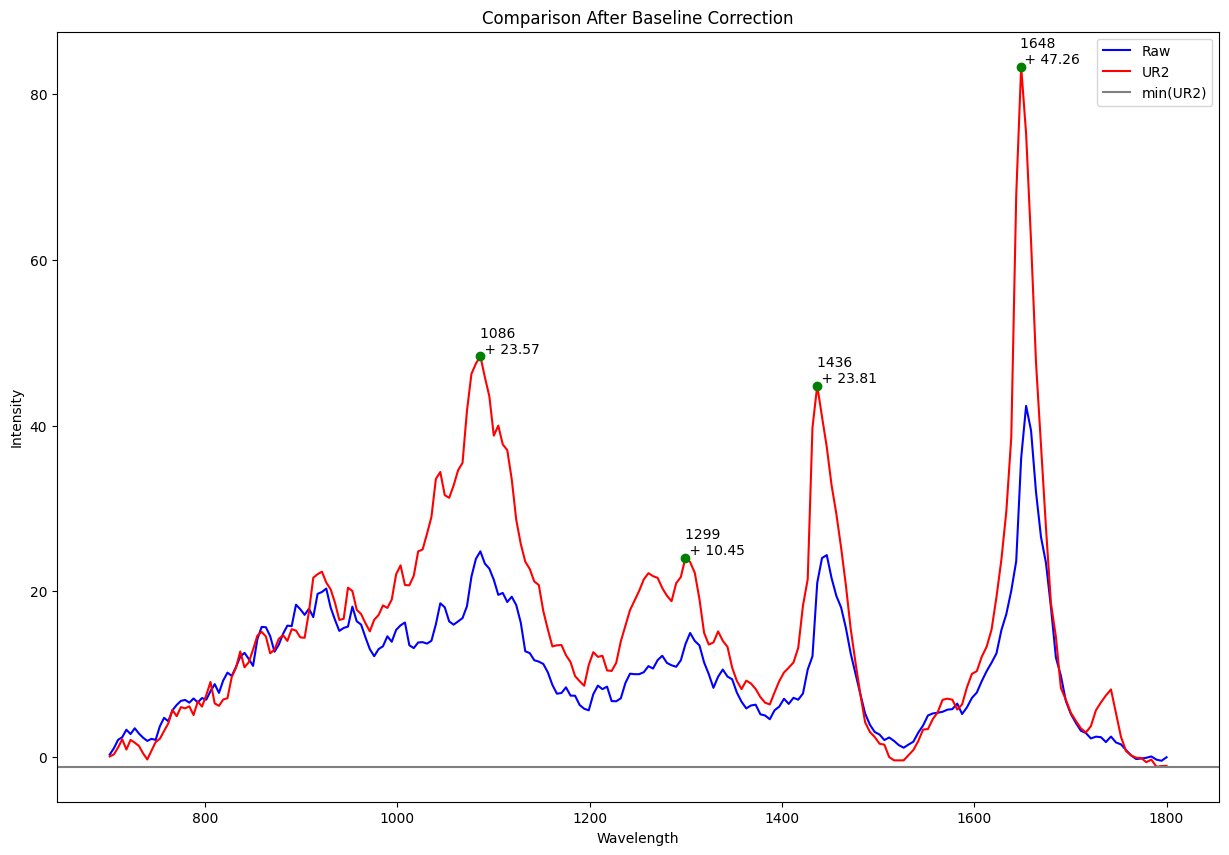

,Wavelength,ChangeValue
29,1648.770000,47.264944
30,1643.630000,44.173762
28,1653.920000,32.858627
72,1431.720000,27.622688
146,1077.010000,24.484853
71,1436.670000,23.807524
147,1072.370000,23.610018
145,1081.650000,23.582189
144,1086.300000,23.569525
27,1659.070000,22.839810


In [ ]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from scipy.signal import find_peaks, peak_prominences

# 데이터 로드 df1 - Raw / df2 - UR2
df1 = pd.read_csv('/content/cnt_new_4lipids.csv')
df2 = pd.read_csv('/content/ur2_4lipids.csv')

# 빈 리스트
list1 = []
list2 = []

# 소수점 둘째 자리까지 반올림
df1 = df1.round(2)
df2 = df2.round(2)

# 첫번째 행 읽기
col1 = df1.columns
col2 = df2.columns

# X축 데이터
x1 = df1[col1[0]]
x2 = df2[col2[0]]

# Raw - Y좌표
for i in range(1, len(col1)):
    colName = f'ROI {i} []'
    list1.append(colName)

# UR2 - Y좌표
for i in range(1, len(col2)):
    colName = f'ROI {i} []'
    list2.append(colName)

# Y좌표 평균값
y1 = df1[list1].mean(axis=1).values
y2 = df2[list2].mean(axis=1).values

# 베이스라인 조정
baseObj1 = BaselineRemoval(y1)
baseObj2 = BaselineRemoval(y2)
Zhangfit_output1 = baseObj1.ZhangFit()
Zhangfit_output2 = baseObj2.ZhangFit()

# peak 변수
baselined_spectrum1 = Zhangfit_output1
baselined_spectrum2 = Zhangfit_output2

# peak값 찾기
peaks, _ = find_peaks(baselined_spectrum1, height=0, width=2)
prominences = peak_prominences(baselined_spectrum1, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum1, prominence=prominence_new)

peaks, _ = find_peaks(baselined_spectrum2, height=0, width=2)
prominences = peak_prominences(baselined_spectrum2, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum2, prominence=prominence_new)

# 그래프 그리기
plt.figure(figsize=(15, 10))
#plt.plot(x1,y1)
#plt.plot(x2, y2)
plt.plot(x1, Zhangfit_output1, label='Raw', color='blue')
plt.plot(x2, Zhangfit_output2, label='UR2', color='red')
#plt.axhline(y=min(Zhangfit_output1), label='min(Raw)', color='gray')
plt.axhline(y=min(Zhangfit_output2), label='min(UR2)', color='gray')
#plt.axhline(y=0, label='y=0', color='gray')

# peak값 그래프 표시 (UR2)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # x 값
    plt.plot(x_value, baselined_spectrum2[peaks[i]], "go")

# 피크점 수치 출력 (파수, UR2-Raw)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # 피크의 x 값
    y_value1 = baselined_spectrum1[peaks[i]]  # 피크의 y 값
    y_value2 = baselined_spectrum2[peaks[i]]  # 피크의 y 값
    change_value = y_value2 - y_value1  # (UR2 - Raw) 차이
    x_value = int(x_value)
    plt.text(x_value, y_value2, f'{x_value} \n +{change_value: .2f}', fontsize=10, verticalalignment='bottom')

# 그래프 범례 및 띄우기
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Comparison After Baseline Correction')
plt.legend()
plt.show()

# 차이값 데이터프레임 생성
df_change = pd.DataFrame({
    'Wavelength': x1,
    'ChangeValue': Zhangfit_output2 - Zhangfit_output1
})

# 정렬하여 차이가 많이 나는 순서대로 출력
df_change_sorted = df_change.sort_values(by='ChangeValue', ascending=False)

# Define a function to format the DataFrame cell text color
def color_negative_red(val):
    color = 'red' if val < 0 else 'blue'
    return f'color: {color}'

# Apply the formatting function to the DataFrame
styled_df = df_change_sorted.style.applymap(color_negative_red, subset=['ChangeValue'])

# Display the styled DataFrame with colored text
styled_df


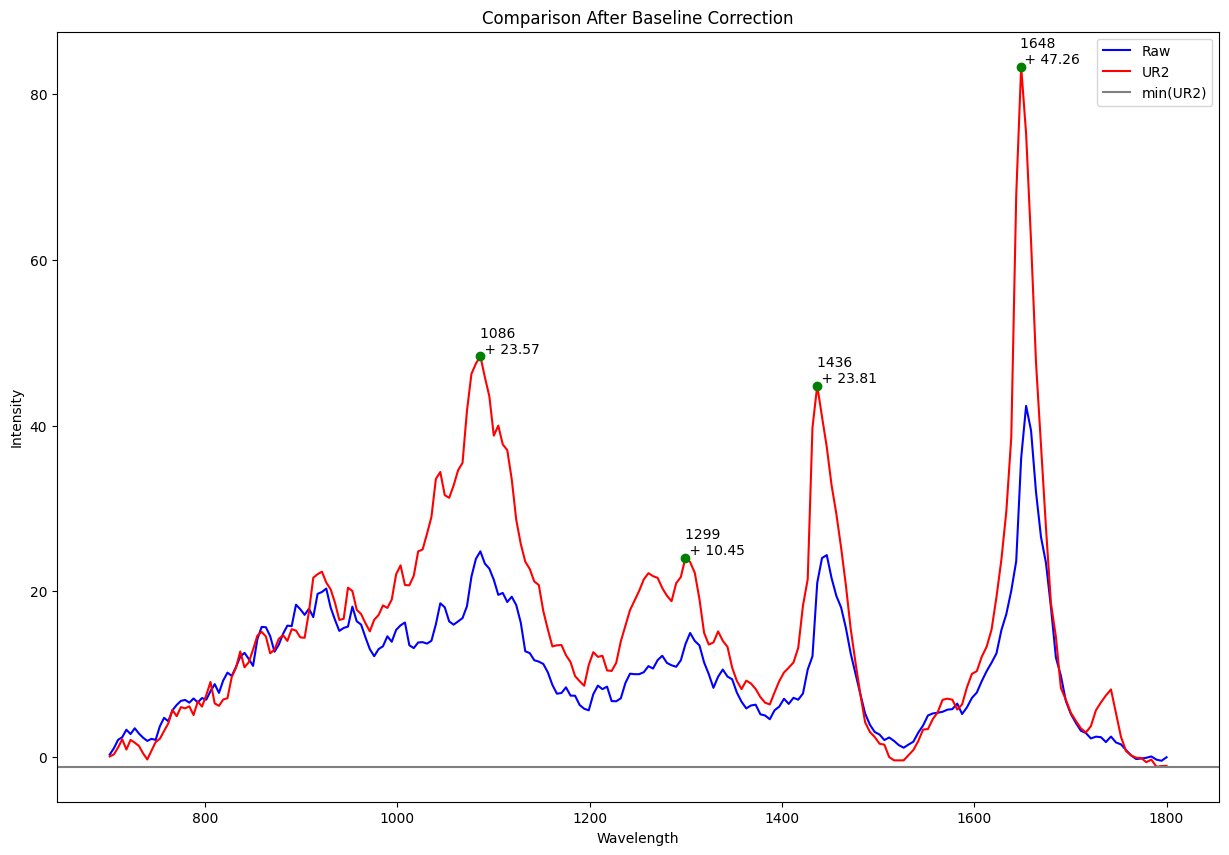

,Wavelength,ChangeValue
29,1648.770000,47.264944
30,1643.630000,44.173762
28,1653.920000,32.858627
72,1431.720000,27.622688
146,1077.010000,24.484853
71,1436.670000,23.807524
147,1072.370000,23.610018
145,1081.650000,23.582189
144,1086.300000,23.569525
27,1659.070000,22.839810


In [ ]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
import seaborn as sns
from BaselineRemoval import BaselineRemoval
from scipy.signal import find_peaks, peak_prominences

# 데이터 로드 df1 - Raw / df2 - UR2
df1 = pd.read_csv('/content/cnt_new_4lipids.csv')
df2 = pd.read_csv('/content/ur2_4lipids.csv')

# 빈 리스트
list1 = []
list2 = []

# 소수점 둘째 자리까지 반올림
df1 = df1.round(2)
df2 = df2.round(2)

# 첫번째 행 읽기
col1 = df1.columns
col2 = df2.columns

# X축 데이터
x1 = df1[col1[0]]
x2 = df2[col2[0]]

# Raw - Y좌표
for i in range(1, len(col1)):
    colName = f'ROI {i} []'
    list1.append(colName)

# UR2 - Y좌표
for i in range(1, len(col2)):
    colName = f'ROI {i} []'
    list2.append(colName)

# Y좌표 평균값
y1 = df1[list1].mean(axis=1).values
y2 = df2[list2].mean(axis=1).values

# 베이스라인 조정
baseObj1 = BaselineRemoval(y1)
baseObj2 = BaselineRemoval(y2)
Zhangfit_output1 = baseObj1.ZhangFit()
Zhangfit_output2 = baseObj2.ZhangFit()

# peak 변수
baselined_spectrum1 = Zhangfit_output1
baselined_spectrum2 = Zhangfit_output2

# peak값 찾기
peaks, _ = find_peaks(baselined_spectrum1, height=0, width=2)
prominences = peak_prominences(baselined_spectrum1, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum1, prominence=prominence_new)

peaks, _ = find_peaks(baselined_spectrum2, height=0, width=2)
prominences = peak_prominences(baselined_spectrum2, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum2, prominence=prominence_new)

# 그래프 그리기
plt.figure(figsize=(15, 10))
#plt.plot(x1,y1)
#plt.plot(x2, y2)
plt.plot(x1, Zhangfit_output1, label='Raw', color='blue')
plt.plot(x2, Zhangfit_output2, label='UR2', color='red')
#plt.axhline(y=min(Zhangfit_output1), label='min(Raw)', color='gray')
plt.axhline(y=min(Zhangfit_output2), label='min(UR2)', color='gray')
#plt.axhline(y=0, label='y=0', color='gray')

# peak값 그래프 표시 (UR2)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # x 값
    plt.plot(x_value, baselined_spectrum2[peaks[i]], "go")

# 피크점 수치 출력 (파수, UR2-Raw)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # 피크의 x 값
    y_value1 = baselined_spectrum1[peaks[i]]  # 피크의 y 값
    y_value2 = baselined_spectrum2[peaks[i]]  # 피크의 y 값
    change_value = y_value2 - y_value1  # (UR2 - Raw) 차이
    x_value = int(x_value)
    plt.text(x_value, y_value2, f'{x_value} \n +{change_value: .2f}', fontsize=10, verticalalignment='bottom')

# 그래프 범례 및 띄우기
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Comparison After Baseline Correction')
plt.legend()
plt.show()

# 차이값 데이터프레임 생성
df_change = pd.DataFrame({
    'Wavelength': x1,
    'ChangeValue': Zhangfit_output2 - Zhangfit_output1
})

# 정렬하여 차이가 많이 나는 순서대로 출력
df_change_sorted = df_change.sort_values(by='ChangeValue', ascending=False)

# Define a function to format the DataFrame cell text color
def color_top5_red(x):
    color = 'red' if x.name < 5 else ''
    return ['color: red' if val > 0 else '' for val in x]

def color_last5_blue(x):
    color = 'blue' if x.name >= len(x) - 5 else ''
    return ['color: blue' if val > 0 else '' for val in x]

# Apply the formatting functions to the DataFrame
styled_df = df_change_sorted.style.apply(color_top5_red, axis=1).apply(color_last5_blue, axis=1)

# Display the styled DataFrame with colored text
styled_df


# **raw graph 출력 일반화**

FileUpload(value={}, accept='.csv', description='Upload')

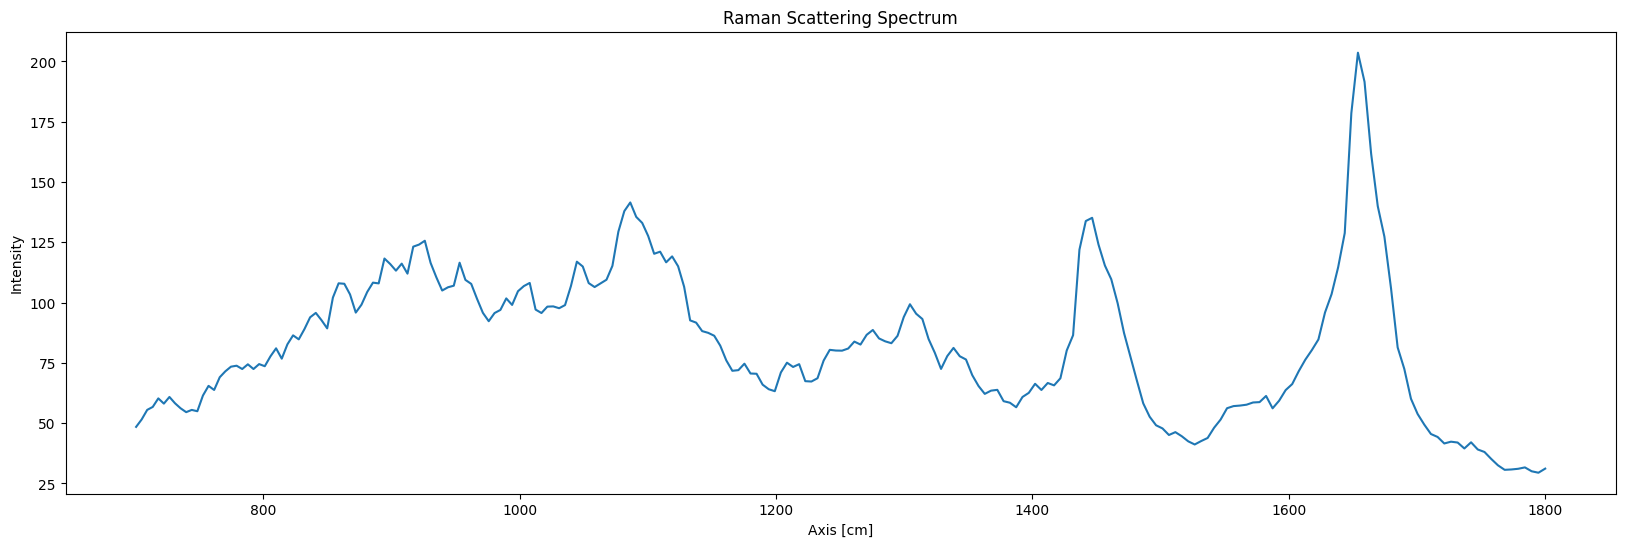

Peak value: nan


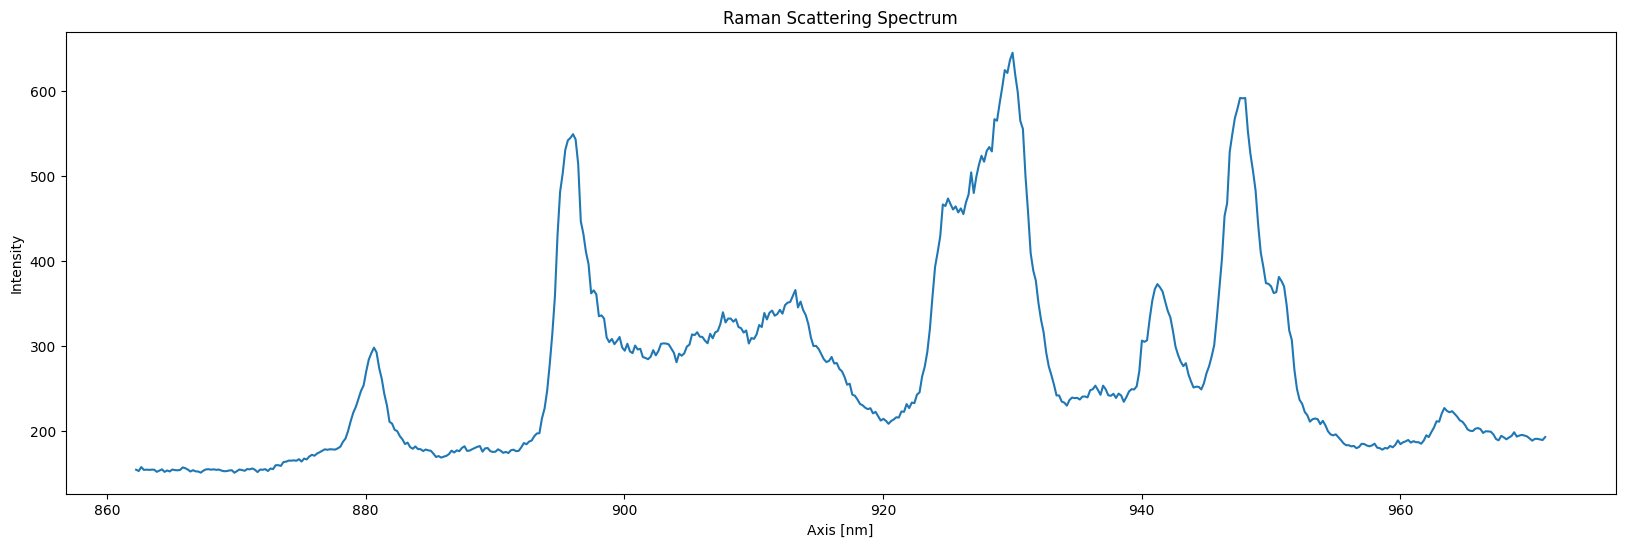

Peak value: nan


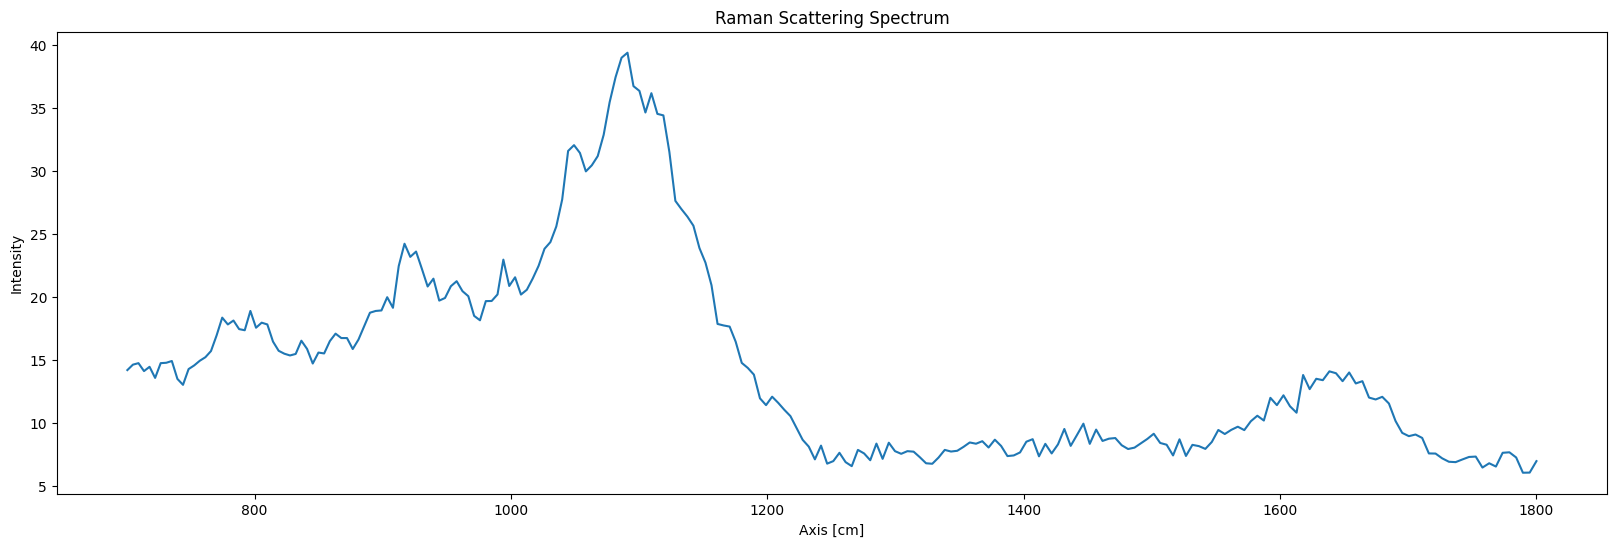

Peak value: nan


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import ipywidgets as widgets
from IPython.display import display

# Create an upload button widget
upload_button = widgets.FileUpload(accept='.csv', multiple=False)

# Define a function to handle the file upload event
def on_upload_button_change(change):
    if upload_button.value:
        uploaded_file = next(iter(upload_button.value))
        file_contents = upload_button.value[uploaded_file]['content']

        # Read the CSV file
        df = pd.read_csv(io.BytesIO(file_contents))

        # Perform data processing and plot the graph
        decimal_columns = df.columns[0:]
        df[decimal_columns] = df[decimal_columns].round(2)

        # Check if the column name is 'Axis [nm]' or 'Axis [cm]'
        x_column = df.columns[df.columns.str.startswith('Axis')][0]
        x_values = df[x_column].values

        roi_columns = df.columns[df.columns.str.startswith('ROI')]
        roi_data = df[roi_columns]

        intensities = roi_data.sum(axis=1)

        plt.figure(figsize=(20, 6))
        plt.plot(x_values, intensities)
        plt.title('Raman Scattering Spectrum')
        plt.xlabel(x_column)
        plt.ylabel('Intensity')
        plt.show()

        peaks = pd.Series(intensities, index=x_values).max()
        print("Peak value:", peaks)

# Attach the file upload event handler
upload_button.observe(on_upload_button_change, names='value')

# Display the upload button
display(upload_button)


# **Baseline 적용 그래프 출력 일반화**

Saving gem_4lipids.csv to gem_4lipids (1).csv


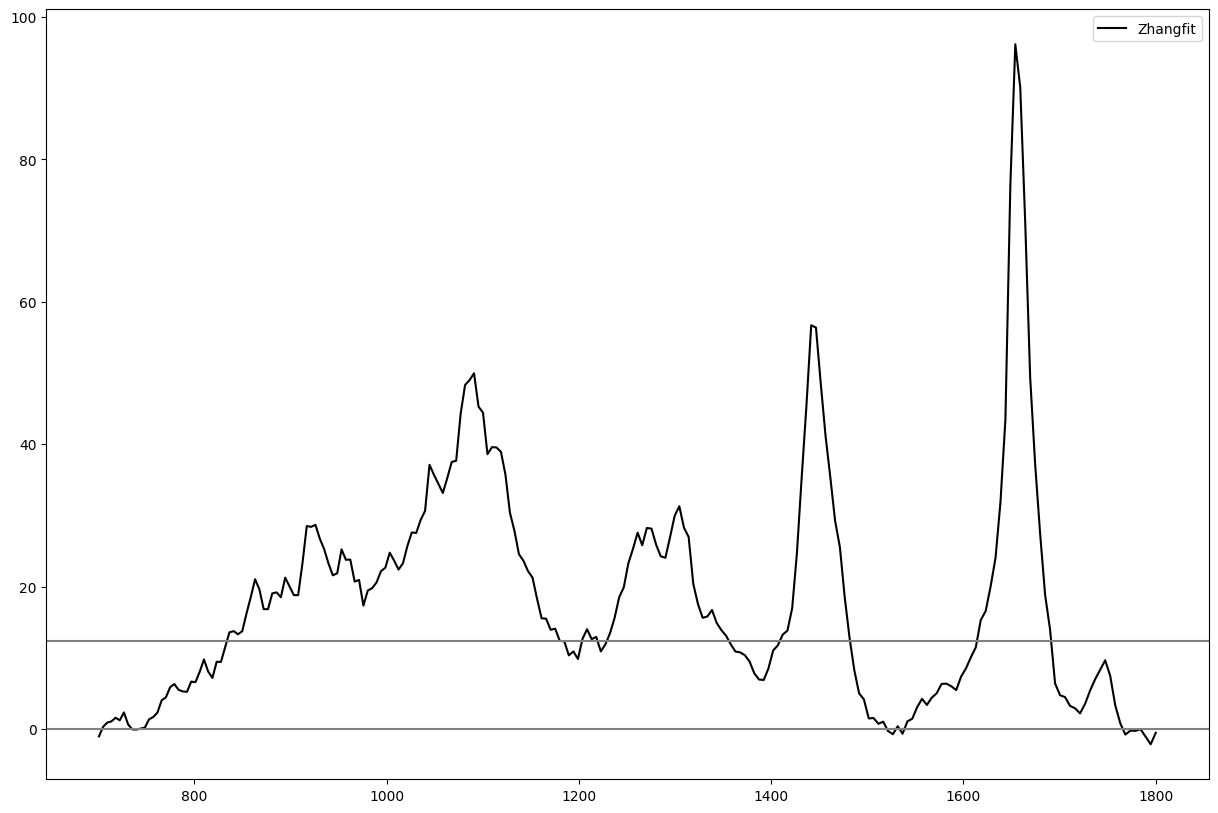

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval
import tkinter as tk
from tkinter import filedialog
from google.colab import files


# 데이터 로드
uploaded = files.upload()

# Read the uploaded file
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# 소수점 둘째 자리까지 반올림
df = df.round(2)

cols = len(df.columns) - 1

# Extract the x-axis column dynamically
x_column = df.columns[df.columns.str.startswith('Axis')][0]
df[x_column] = df[x_column].replace('[\$,]', '', regex=True).astype(float)
x = df[x_column].values

# Extract the y-axis data dynamically
y_column = df.columns[df.columns.str.startswith('ROI')][0]
y = df[y_column].replace('[\$,]', '', regex=True).astype(float)

# 다항식 차수
polynomial_degree = 3

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()

# 그래프 그리기
plt.figure(figsize=(15, 10))
plt.plot(x, Zhangfit_output, label='Zhangfit', color='black')
plt.axhline(y=min(y), color='gray')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


Saving gem_4lipids_backgroundsignal1.csv to gem_4lipids_backgroundsignal1 (2).csv


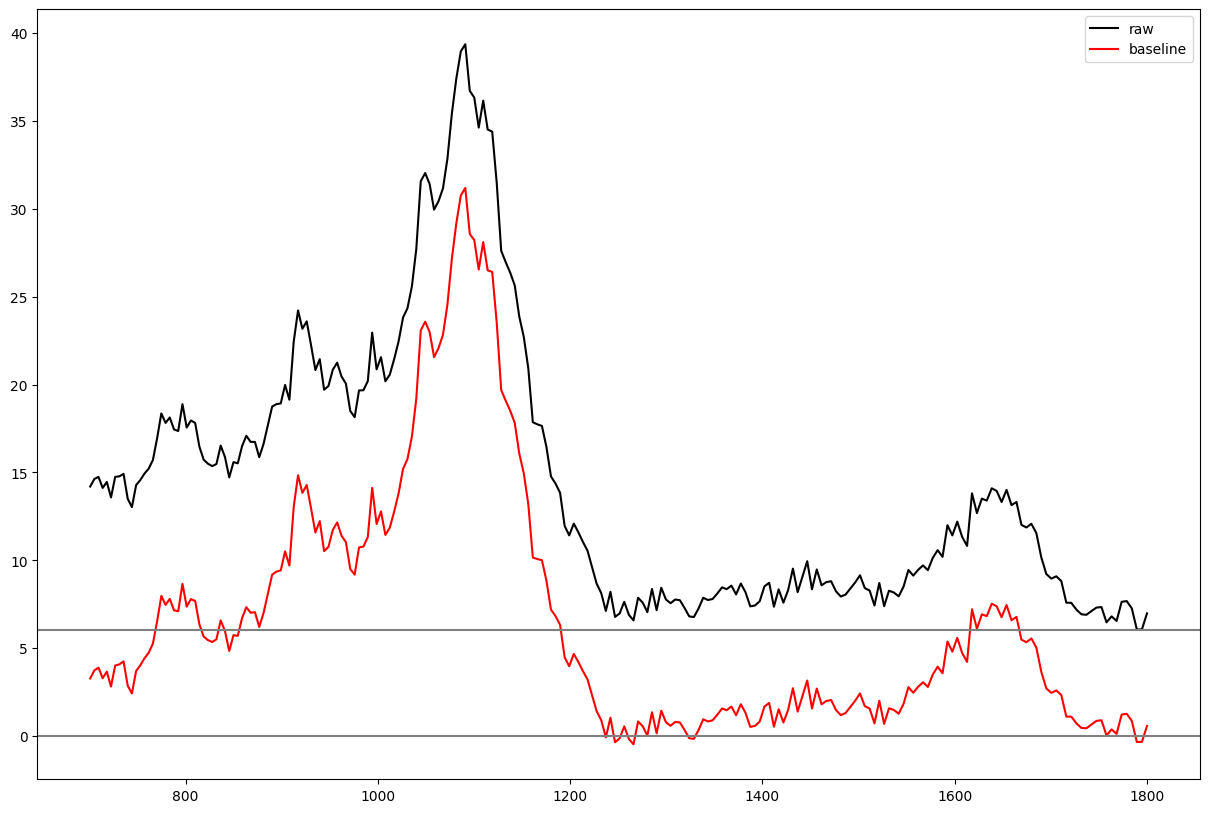

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval
import tkinter as tk
from tkinter import filedialog
from google.colab import files


# 데이터 로드
uploaded = files.upload()

# Read the uploaded file
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# 소수점 둘째 자리까지 반올림
df = df.round(2)

cols = len(df.columns) - 1

# Extract the x-axis column dynamically
x_column = df.columns[df.columns.str.startswith('Axis')][0]
df[x_column] = df[x_column].replace('[\$,]', '', regex=True).astype(float)
x = df[x_column].values

# Extract the y-axis data dynamically
y_column = df.columns[df.columns.str.startswith('ROI')][0]
y = df[y_column].replace('[\$,]', '', regex=True).astype(float)

# 다항식 차수
polynomial_degree = 3

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()

# 그래프 그리기
plt.figure(figsize=(15, 10))
plt.plot(x, y, label='raw', color='black')
plt.plot(x, Zhangfit_output, label='baseline', color='red')
plt.axhline(y=min(y), color='gray')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


# **마우스 오버**

In [ ]:
import sys
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, peak_prominences
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QIcon
import mplcursors
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg

# 데이터 로드 df1 - Raw / df2 - UR2
df1 = pd.read_csv('cnt_new_4lipids.csv')
df2 = pd.read_csv('ur2_4lipids.csv')

# 빈 리스트
list1 = []
list2 = []

# 소수점 둘째 자리까지 반올림
df1 = df1.round(2)
df2 = df2.round(2)

# 첫번째 행 읽기
col1 = df1.columns
col2 = df2.columns

# X축 데이터
x1 = df1[col1[0]]
x2 = df2[col2[0]]

# Raw - Y좌표
for i in range(1, len(col1)):
    colName = f'ROI {i} []'
    list1.append(colName)

# UR2 - Y좌표
for i in range(1, len(col2)):
    colName = f'ROI {i} []'
    list2.append(colName)

# Y좌표 평균값
y1 = df1[list1].mean(axis=1).values
y2 = df2[list2].mean(axis=1).values

# 베이스라인 조정
def baseline_correction(x, y):
    # Fit a cubic spline to the data points
    spline = interp1d(x, y, kind='cubic')

    # Define the baseline function to be minimized
    def baseline_func(params):
        c = params[:-1]
        w = params[-1]
        return np.sum((y - spline(x) - np.polyval(c, x))**2) + w*np.sum(np.gradient(c)**2)

    # Initial guess for the coefficients and smoothing parameter
    c0 = np.zeros(4)
    w0 = 1.0

    # Minimize the baseline function
    result = minimize(baseline_func, np.concatenate([c0, [w0]]), method='L-BFGS-B')

    # Get the optimized baseline coefficients
    c_opt = result.x[:-1]

    # Evaluate the baseline
    baseline = np.polyval(c_opt, x)

    # Subtract the baseline from the original data
    y_corrected = y - baseline

    return y_corrected

# Apply baseline correction
y1_corrected = baseline_correction(x1, y1)
y2_corrected = baseline_correction(x2, y2)

# 그래프 그리기
class GraphWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("Comparison After Baseline Correction")
        self.setWindowIcon(QIcon("icon.png"))

        self.figure = plt.figure(figsize=(10, 6))
        self.canvas = FigureCanvasQTAgg(self.figure)
        self.setCentralWidget(self.canvas)

        self.ax = self.figure.add_subplot(111)
        self.ax.plot(x1, y1_corrected, label='Raw', color='blue')
        self.ax.plot(x2, y2_corrected, label='UR2', color='red')
        self.ax.axhline(y=min(y2_corrected), label='min(UR2)', color='gray')

        self.cursor_label = QLabel(self)
        self.cursor_label.setAlignment(Qt.AlignCenter)
        self.cursor_label.setStyleSheet("background-color: white; font-weight: bold; padding: 5px;")
        self.cursor_label.hide()

        self.setGeometry(100, 100, 640, 480)
        self.show()

        # Use mplcursors to display wavelength values on hover
        cursor = mplcursors.cursor(hover=True)

        # Create a function to format the tooltip text
        def format_tooltip(sel):
            index = int(sel.target.index)
            wavelength = x1[index]
            intensity1 = y1_corrected[index]
            intensity2 = y2_corrected[index]
            change_value = intensity2 - intensity1
            return f'Wavelength: {wavelength}\nIntensity (Raw): {intensity1}\nIntensity (UR2): {intensity2}\nChange Value: {change_value}'

        # Set the tooltip formatter function for the cursor
        cursor.connect("add", lambda sel: sel.annotation.set_text(format_tooltip(sel)))

app = QApplication(sys.argv)
window = GraphWindow()
sys.exit(app.exec_())


In [ ]:
import sys
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, peak_prominences
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QIcon
import mplcursors
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg

# 데이터 로드 df1 - Raw / df2 - UR2
df1 = pd.read_csv('cnt_new_4lipids.csv')
df2 = pd.read_csv('ur2_4lipids.csv')

# 빈 리스트
list1 = []
list2 = []

# 소수점 둘째 자리까지 반올림
df1 = df1.round(2)
df2 = df2.round(2)

# 첫번째 행 읽기
col1 = df1.columns
col2 = df2.columns

# X축 데이터
x1 = df1[col1[0]]
x2 = df2[col2[0]]

# Raw - Y좌표
for i in range(1, len(col1)):
    colName = f'ROI {i} []'
    list1.append(colName)

# UR2 - Y좌표
for i in range(1, len(col2)):
    colName = f'ROI {i} []'
    list2.append(colName)

# Y좌표 평균값
y1 = df1[list1].mean(axis=1).values
y2 = df2[list2].mean(axis=1).values

# 베이스라인 조정
def baseline_correction(x, y):
    # Fit a cubic spline to the data points
    spline = interp1d(x, y, kind='cubic')

    # Define the baseline function to be minimized
    def baseline_func(params):
        c = params[:-1]
        w = params[-1]
        return np.sum((y - spline(x) - np.polyval(c, x))**2) + w*np.sum(np.gradient(c)**2)

    # Initial guess for the coefficients and smoothing parameter
    c0 = np.zeros(4)
    w0 = 1.0

    # Minimize the baseline function
    result = minimize(baseline_func, np.concatenate([c0, [w0]]), method='L-BFGS-B')

    # Get the optimized baseline coefficients
    c_opt = result.x[:-1]

    # Evaluate the baseline
    baseline = np.polyval(c_opt, x)

    # Subtract the baseline from the original data
    y_corrected = y - baseline

    return y_corrected

# Apply baseline correction
y1_corrected = baseline_correction(x1, y1)
y2_corrected = baseline_correction(x2, y2)

# 그래프 그리기
class GraphWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("Comparison After Baseline Correction")
        self.setWindowIcon(QIcon("icon.png"))

        self.figure = plt.figure(figsize=(10, 6))
        self.canvas = FigureCanvasQTAgg(self.figure)
        self.figure.canvas = self.canvas  # FigureCanvasQTAgg를 Figure에 연결
        self.setCentralWidget(self.canvas)

        self.ax = self.figure.add_subplot(111)
        self.ax.plot(x1, y1_corrected, label='Raw', color='blue')
        self.ax.plot(x2, y2_corrected, label='UR2', color='red')
        self.ax.axhline(y=min(y2_corrected), label='min(UR2)', color='gray')

        self.cursor_label = QLabel(self)
        self.cursor_label.setAlignment(Qt.AlignCenter)
        self.cursor_label.setStyleSheet("background-color: white; font-weight: bold; padding: 5px;")
        self.cursor_label.hide()

        self.setGeometry(100, 100, 640, 480)
        self.show()

        # Use mplcursors to display wavelength values on hover
        cursor = mplcursors.cursor(hover=True)

        # Create a function to format the tooltip text
        def format_tooltip(sel):
            index = int(sel.target.index)
            wavelength = x1[index]
            intensity1 = y1_corrected[index]
            intensity2 = y2_corrected[index]
            change_value = intensity2 - intensity1
            return f'Wavelength: {wavelength}\nIntensity (Raw): {intensity1}\nIntensity (UR2): {intensity2}\nChange Value: {change_value}'

        # Set the tooltip formatter function for the cursor
        cursor.connect("add", lambda sel: sel.annotation.set_text(format_tooltip(sel)))

app = QApplication(sys.argv)
window = GraphWindow()
sys.exit(app.exec_())


# **두 그래프 차이 출력**

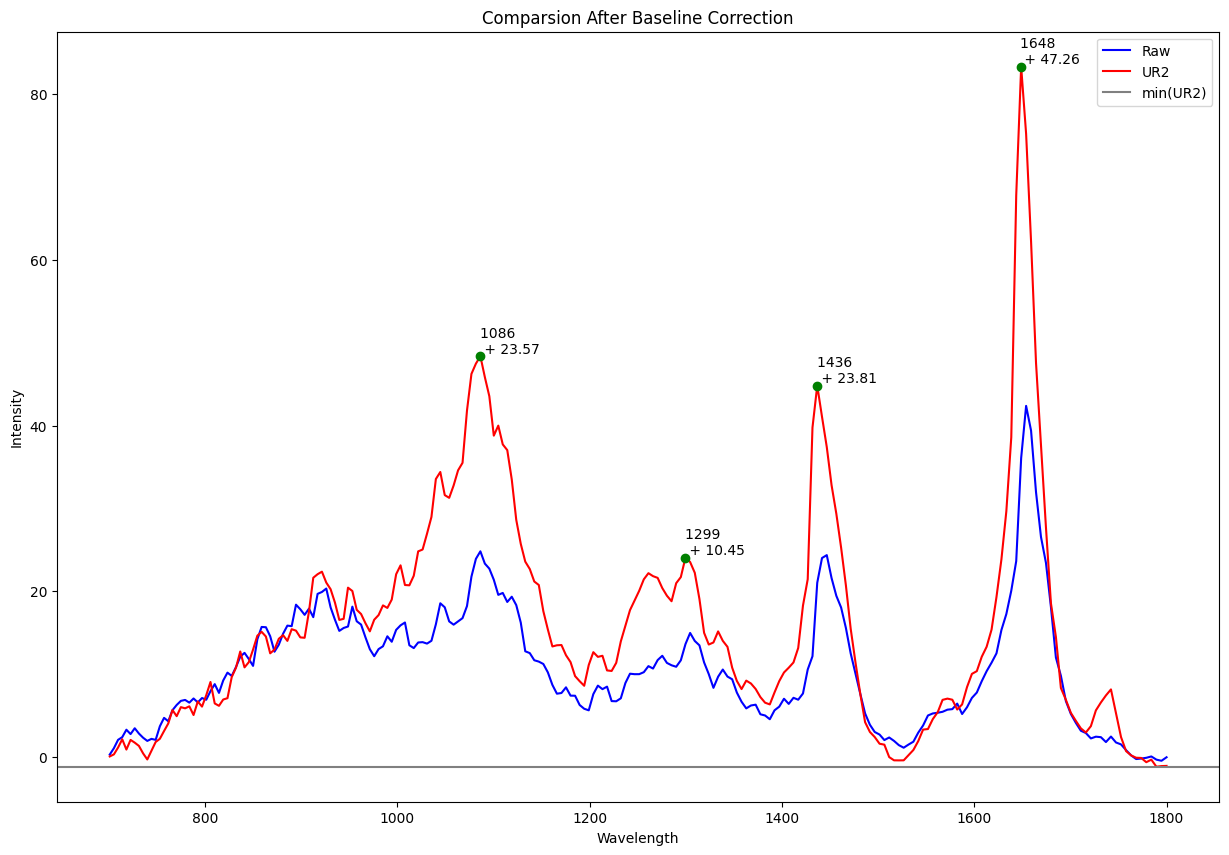

,Wavelength,ChangeValue
0,1800.00,-1.044017
1,1794.72,-0.641991
2,1789.44,-0.856557
3,1784.17,-0.388011
4,1778.90,-0.531413
...,...,...
226,718.13,-2.397958
227,713.80,-0.255063
228,709.47,-0.929667
229,705.14,-0.748186


In [ ]:
# Raw, UR2 - Zhangfit 그래프 합치기
# Peak 표시 - x좌표 + y좌표 차이 표시
# Peak 수정 + y 차이값 데이터프레임 생성
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval
from scipy.signal import find_peaks, peak_prominences

# 데이터 로드 df1 - Raw / df2 - UR2
df1 = pd.read_csv('/content/cnt_new_4lipids.csv')
df2 = pd.read_csv('/content/ur2_4lipids.csv')

# 빈 리스트
list1 = []
list2 = []

# 소수점 둘째 자리까지 반올림
df1 = df1.round(2)
df2 = df2.round(2)

# 첫번째 행 읽기
col1 = df1.columns
col2 = df2.columns

# X축 데이터
x1 = df1[col1[0]]
x2 = df2[col2[0]]

# Raw - Y좌표
for i in range(1,len(col1)):
    colName = f'ROI {i} []'
    #df1[colName] = df1[colName].replace('[\$,]', '', regex=True).astype(float)
    list1.append(colName)

# UR2 - Y좌표
for i in range(1,len(col2)):
    colName = f'ROI {i} []'
    #df2[colName] = df2[colName].replace('[\$,]', '', regex=True).astype(float)
    list2.append(colName)

# Y좌표 평균값
y1 = df1[list1].mean(axis=1).values
y2 = df2[list2].mean(axis=1).values

# 베이스라인 조정
baseObj1 = BaselineRemoval(y1)
baseObj2 = BaselineRemoval(y2)
Zhangfit_output1 = baseObj1.ZhangFit()
Zhangfit_output2 = baseObj2.ZhangFit()

# peak 변수
baselined_spectrum1 = Zhangfit_output1
baselined_spectrum2 = Zhangfit_output2

# peak값 찾기
peaks, _ = find_peaks(baselined_spectrum1, height=0, width=2)
prominences = peak_prominences(baselined_spectrum1, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum1, prominence=prominence_new)

peaks, _ = find_peaks(baselined_spectrum2, height=0, width=2)
prominences = peak_prominences(baselined_spectrum2, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum2, prominence=prominence_new)

# 그래프 그리기
plt.figure(figsize=(15,10))
#plt.plot(x1,y1)
#plt.plot(x2, y2)
plt.plot(x1, Zhangfit_output1, label='Raw', color='blue')
plt.plot(x2, Zhangfit_output2, label='UR2', color='red')
#plt.axhline(y=min(Zhangfit_output1), label='min(Raw)', color='gray')
plt.axhline(y=min(Zhangfit_output2), label='min(UR2)', color='gray')
#plt.axhline(y=0, label='y=0', color='gray')

# peak값 그래프 표시 (UR2)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # x 값
    plt.plot(x_value, baselined_spectrum2[peaks[i]], "go")

# 피크점 수치 출력 (파수, UR2-Raw)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # 피크의 x 값
    y_value1 = baselined_spectrum1[peaks[i]]  # 피크의 y 값
    y_value2 = baselined_spectrum2[peaks[i]]  # 피크의 y 값
    change_value = y_value2 - y_value1 # (UR2 - Raw) 차이
    x_value = int(x_value)
    plt.text(x_value, y_value2, f'{x_value} \n +{change_value: .2f}', fontsize=10, verticalalignment='bottom')

# 그래프 범례 및 띄우기
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Comparsion After Baseline Correction')
plt.legend()
plt.show()

# 차이값 데이터프레임 생성
df_change = pd.DataFrame({
    'Wavelength' : x1,
    'ChangeValue' : Zhangfit_output2-Zhangfit_output1
})
df_change

# **두 그래프 차이 input**

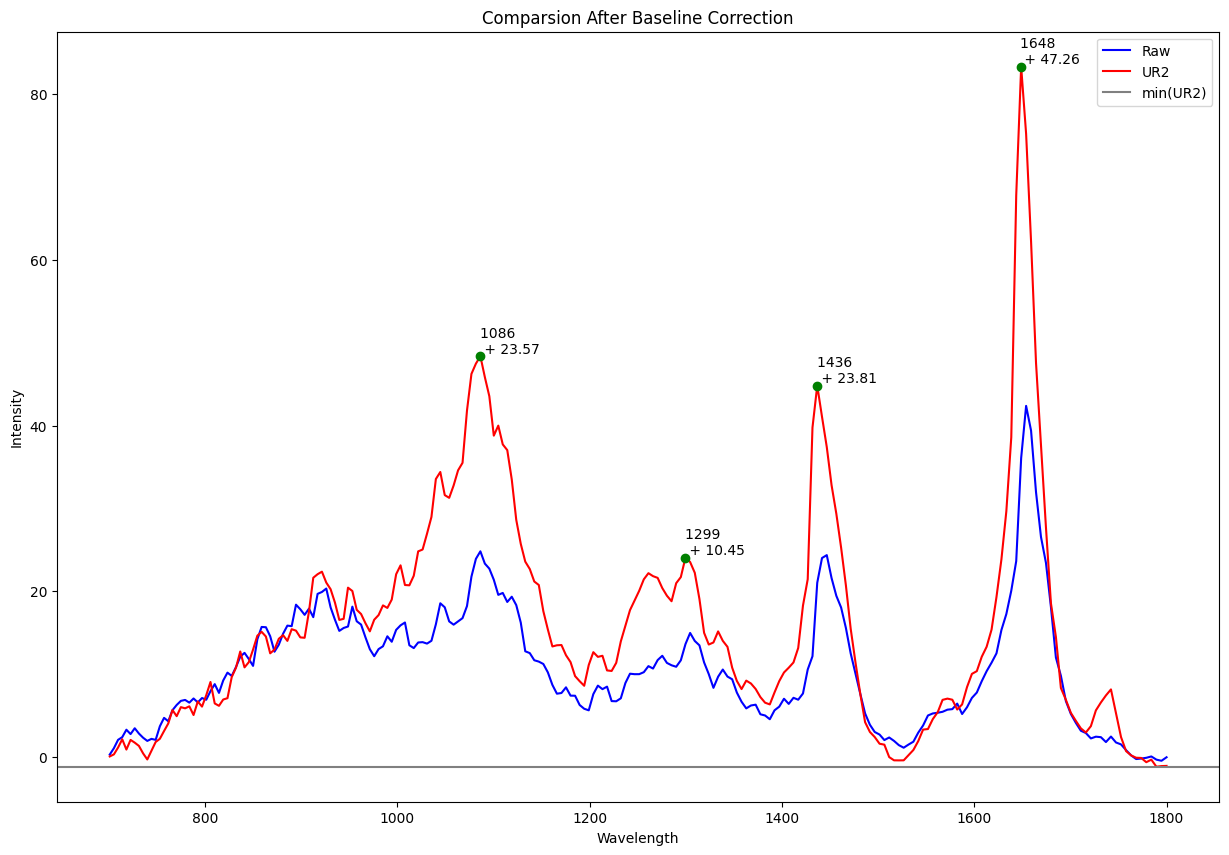

,Wavelength,ChangeValue
0,1800.00,-1.044017
1,1794.72,-0.641991
2,1789.44,-0.856557
3,1784.17,-0.388011
4,1778.90,-0.531413
...,...,...
226,718.13,-2.397958
227,713.80,-0.255063
228,709.47,-0.929667
229,705.14,-0.748186


In [ ]:
# Raw, UR2 - Zhangfit 그래프 합치기
# Peak 표시 - x좌표 + y좌표 차이 표시
# Peak 수정 + y 차이값 데이터프레임 생성
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval
from scipy.signal import find_peaks, peak_prominences

# 데이터 로드 df1 - Raw / df2 - UR2
df1 = pd.read_csv('/content/cnt_new_4lipids.csv')
df2 = pd.read_csv('/content/ur2_4lipids.csv')

# 빈 리스트
list1 = []
list2 = []

# 소수점 둘째 자리까지 반올림
df1 = df1.round(2)
df2 = df2.round(2)

# 첫번째 행 읽기
col1 = df1.columns
col2 = df2.columns

# X축 데이터
x1 = df1[col1[0]]
x2 = df2[col2[0]]

# Raw - Y좌표
for i in range(1,len(col1)):
    colName = f'ROI {i} []'
    #df1[colName] = df1[colName].replace('[\$,]', '', regex=True).astype(float)
    list1.append(colName)

# UR2 - Y좌표
for i in range(1,len(col2)):
    colName = f'ROI {i} []'
    #df2[colName] = df2[colName].replace('[\$,]', '', regex=True).astype(float)
    list2.append(colName)

# Y좌표 평균값
y1 = df1[list1].mean(axis=1).values
y2 = df2[list2].mean(axis=1).values

# 베이스라인 조정
baseObj1 = BaselineRemoval(y1)
baseObj2 = BaselineRemoval(y2)
Zhangfit_output1 = baseObj1.ZhangFit()
Zhangfit_output2 = baseObj2.ZhangFit()

# peak 변수
baselined_spectrum1 = Zhangfit_output1
baselined_spectrum2 = Zhangfit_output2

# peak값 찾기
peaks, _ = find_peaks(baselined_spectrum1, height=0, width=2)
prominences = peak_prominences(baselined_spectrum1, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum1, prominence=prominence_new)

peaks, _ = find_peaks(baselined_spectrum2, height=0, width=2)
prominences = peak_prominences(baselined_spectrum2, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum2, prominence=prominence_new)

# 그래프 그리기
plt.figure(figsize=(15,10))
#plt.plot(x1,y1)
#plt.plot(x2, y2)
plt.plot(x1, Zhangfit_output1, label='Raw', color='blue')
plt.plot(x2, Zhangfit_output2, label='UR2', color='red')
#plt.axhline(y=min(Zhangfit_output1), label='min(Raw)', color='gray')
plt.axhline(y=min(Zhangfit_output2), label='min(UR2)', color='gray')
#plt.axhline(y=0, label='y=0', color='gray')

# peak값 그래프 표시 (UR2)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # x 값
    plt.plot(x_value, baselined_spectrum2[peaks[i]], "go")

# 피크점 수치 출력 (파수, UR2-Raw)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # 피크의 x 값
    y_value1 = baselined_spectrum1[peaks[i]]  # 피크의 y 값
    y_value2 = baselined_spectrum2[peaks[i]]  # 피크의 y 값
    change_value = y_value2 - y_value1 # (UR2 - Raw) 차이
    x_value = int(x_value)
    plt.text(x_value, y_value2, f'{x_value} \n +{change_value: .2f}', fontsize=10, verticalalignment='bottom')

# 그래프 범례 및 띄우기
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Comparsion After Baseline Correction')
plt.legend()
plt.show()

# 차이값 데이터프레임 생성
df_change = pd.DataFrame({
    'Wavelength' : x1,
    'ChangeValue' : Zhangfit_output2-Zhangfit_output1
})
df_change



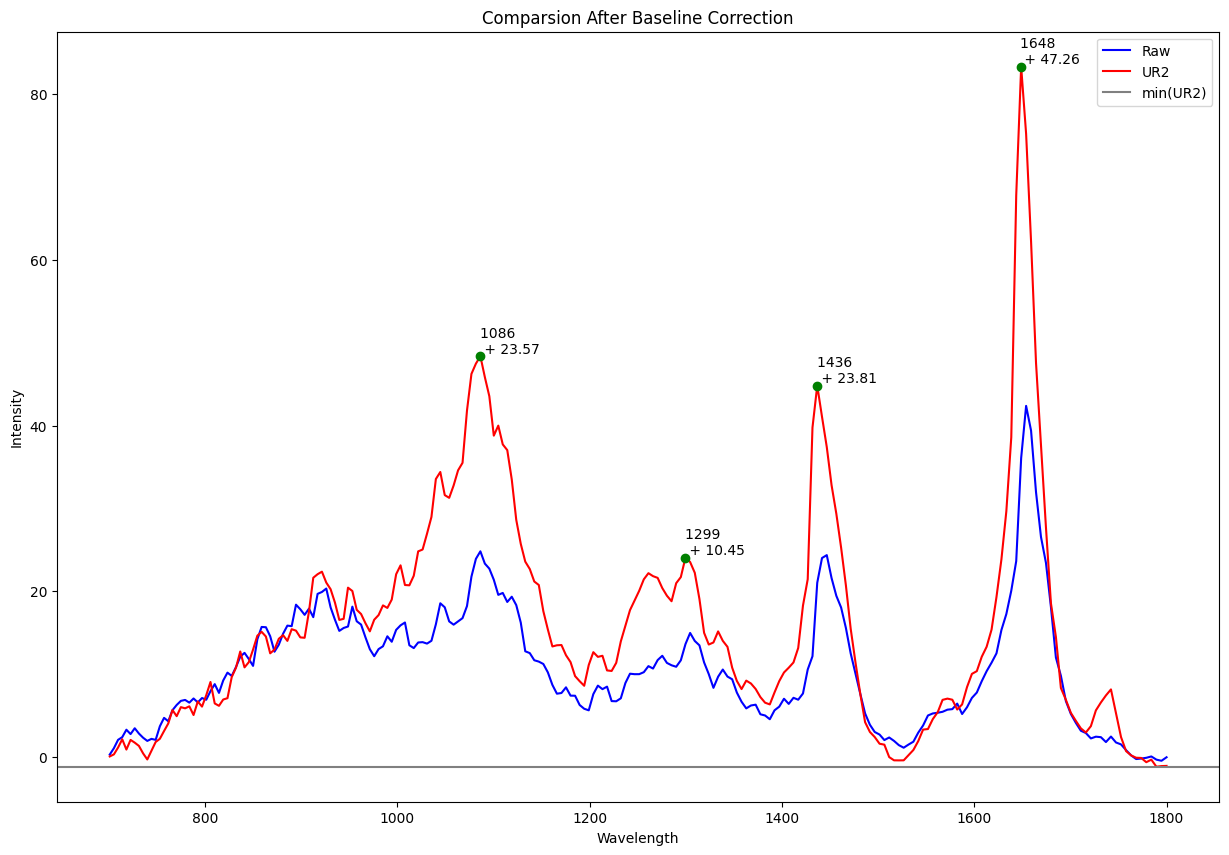

     Wavelength  ChangeValue
0       1800.00    -1.044017
1       1794.72    -0.641991
2       1789.44    -0.856557
3       1784.17    -0.388011
4       1778.90    -0.531413
..          ...          ...
226      718.13    -2.397958
227      713.80    -0.255063
228      709.47    -0.929667
229      705.14    -0.748186
230      700.81    -0.226105

[231 rows x 2 columns]
Enter a wavelength value: 1778.90
The change value at wavelength 1778.9 is: -0.531412696834388


In [ ]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval
from scipy.signal import find_peaks, peak_prominences

# 데이터 로드 df1 - Raw / df2 - UR2
df1 = pd.read_csv('/content/cnt_new_4lipids.csv')
df2 = pd.read_csv('/content/ur2_4lipids.csv')

# 빈 리스트
list1 = []
list2 = []

# 소수점 둘째 자리까지 반올림
df1 = df1.round(2)
df2 = df2.round(2)

# 첫번째 행 읽기
col1 = df1.columns
col2 = df2.columns

# X축 데이터
x1 = df1[col1[0]]
x2 = df2[col2[0]]

# Raw - Y좌표
for i in range(1,len(col1)):
    colName = f'ROI {i} []'
    #df1[colName] = df1[colName].replace('[\$,]', '', regex=True).astype(float)
    list1.append(colName)

# UR2 - Y좌표
for i in range(1,len(col2)):
    colName = f'ROI {i} []'
    #df2[colName] = df2[colName].replace('[\$,]', '', regex=True).astype(float)
    list2.append(colName)

# Y좌표 평균값
y1 = df1[list1].mean(axis=1).values
y2 = df2[list2].mean(axis=1).values

# 베이스라인 조정
baseObj1 = BaselineRemoval(y1)
baseObj2 = BaselineRemoval(y2)
Zhangfit_output1 = baseObj1.ZhangFit()
Zhangfit_output2 = baseObj2.ZhangFit()

# peak 변수
baselined_spectrum1 = Zhangfit_output1
baselined_spectrum2 = Zhangfit_output2

# peak값 찾기
peaks, _ = find_peaks(baselined_spectrum1, height=0, width=2)
prominences = peak_prominences(baselined_spectrum1, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum1, prominence=prominence_new)

peaks, _ = find_peaks(baselined_spectrum2, height=0, width=2)
prominences = peak_prominences(baselined_spectrum2, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 80, 100], interpolation='nearest')[3]
peaks, _ = find_peaks(baselined_spectrum2, prominence=prominence_new)

# 그래프 그리기
plt.figure(figsize=(15,10))
#plt.plot(x1,y1)
#plt.plot(x2, y2)
plt.plot(x1, Zhangfit_output1, label='Raw', color='blue')
plt.plot(x2, Zhangfit_output2, label='UR2', color='red')
#plt.axhline(y=min(Zhangfit_output1), label='min(Raw)', color='gray')
plt.axhline(y=min(Zhangfit_output2), label='min(UR2)', color='gray')
#plt.axhline(y=0, label='y=0', color='gray')

# peak값 그래프 표시 (UR2)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # x 값
    plt.plot(x_value, baselined_spectrum2[peaks[i]], "go")

# 피크점 수치 출력 (파수, UR2-Raw)
for i in range(len(peaks)):
    x_value = x2[peaks[i]]  # 피크의 x 값
    y_value1 = baselined_spectrum1[peaks[i]]  # 피크의 y 값
    y_value2 = baselined_spectrum2[peaks[i]]  # 피크의 y 값
    change_value = y_value2 - y_value1 # (UR2 - Raw) 차이
    x_value = int(x_value)
    plt.text(x_value, y_value2, f'{x_value} \n +{change_value: .2f}', fontsize=10, verticalalignment='bottom')

# 그래프 범례 및 띄우기
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Comparsion After Baseline Correction')
plt.legend()
plt.show()

# 차이값 데이터프레임 생성
df_change = pd.DataFrame({
    'Wavelength' : x1,
    'ChangeValue' : Zhangfit_output2-Zhangfit_output1
})
print(df_change)

user_input = float(input("Enter a wavelength value: "))

change_value = df_change.loc[df_change['Wavelength'] == user_input, 'ChangeValue'].values[0]
print(f"The change value at wavelength {user_input} is: {change_value}")
